In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cirrhosis.csv', index_col='ID')
df.head()   

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.select_dtypes(exclude=(['object'])).isna().sum()
df_num_col=df.select_dtypes(exclude=(['object'])).columns
for i in df_num_col:
  df[i].fillna(df[i].median(),inplace=True)

df.select_dtypes(exclude=(['object'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
df.select_dtypes(include=(['object'])).isna().sum()
df_obj_col=df.select_dtypes(include=(['object'])).columns

for i in df_obj_col:
  df[i].fillna(df[i].mode()[0],inplace=True)

df.select_dtypes(include=(['object'])).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [ ]:
 #df['Stage']=np.where(df['Stage']==4,1,0)
#np.where(df['Stage']==4?1:0)

In [ ]:
# df['Hepatomegaly'].value_counts()

In [ ]:
#replacing categorical data with integers
df['Sex']=df['Sex'].replace({'M':0,'F':1})

df['Ascites']=df['Ascites'].replace({'N':0,'Y':1})

df['Drug']=df['Drug'].replace({'D-penicillamine':0,'Placebo':1})

df['Hepatomegaly']=df['Hepatomegaly'].replace({'Y':1,'N':0})
df['Spiders']=df['Spiders'].replace({'N':0,'Y':1})
df['Edema']=df['Edema'].replace({'N':0,'Y':1,'S':-1})
df['Status']=df['Status'].replace({'C':0,'CL':1,'D':-1})

In [ ]:
X=df.drop(['Status','N_Days','Stage'],axis=1)
Y=df.pop('Stage')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=5000,solver='saga')
skf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train,test,fold_no):
  X_train=train
  Y_train=Y.iloc[train_index]
  X_test=test
  Y_test=Y.iloc[test_index]
  log_model.fit(X_train,Y_train)
  score=log_model.score(X_test,Y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no=1
for train_index,test_index in skf.split(X,Y):
  train=X.iloc[train_index,:]
  test=X.iloc[test_index,:]
  training(train,test,fold_no)
  fold_no+=1
print()
print('Logistic Regression Mean Accuracy=',np.mean(acc))

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.7380952380952381
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.6341463414634146

Logistic Regression Mean Accuracy= 0.7032520325203252


In [ ]:
from sklearn.metrics import classification_report
log_model_predict=log_model.predict(test)
log_model_predict_proba=log_model.predict_proba(test)

print(classification_report(Y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.45      0.36      0.40        14

    accuracy                           0.63        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.62      0.63      0.62        41



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc=auc(fpr,tpr)

print('AUC:', roc_auc_score(Y.iloc[test_index],log_model_predict_proba[:,1]))

AUC: 0.6507936507936508


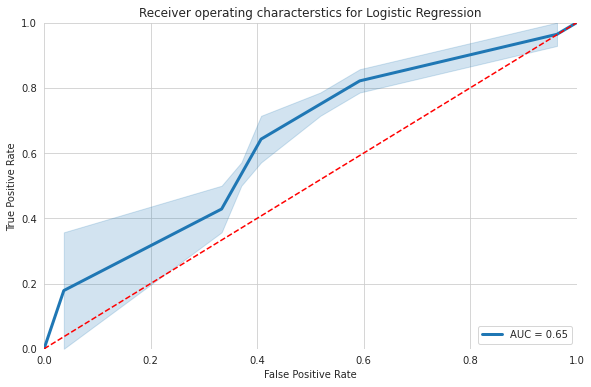

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver operating characterstics for Logistic Regression')
sns.lineplot(x=fpr, y=tpr, label='AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False,bottom=False)
sns.despine(top=True,bottom=True,left=True)

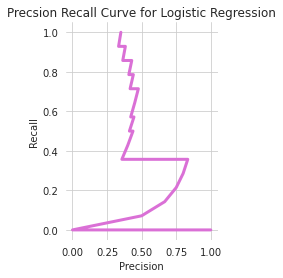

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
precision, recall, thresholds =precision_recall_curve(Y.iloc[test_index],log_model_predict_proba[:,1])

plt.subplot(1,2,2)
plt.plot(precision, recall, linewidth=3,color='orchid')
sns.despine(top=True,bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precsion Recall Curve for Logistic Regression');

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf=StratifiedKFold(n_splits=20, random_state=1,shuffle=True)
model=XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error')

acc=[]
def training(train, test, fold_no):
  X_train=train
  Y_train=Y.iloc[train_index]
  X_test=test
  Y_test=Y.iloc[test_index]
  model.fit(X_train,Y_train)
  score=model.score(X_test,Y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no=1
for train_index, test_index in skf.split(X,Y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no +=1
print()
print('XGboost model mean accuracy=', np.mean(acc))

For Fold 1 the accuracy is 0.8571428571428571
For Fold 2 the accuracy is 0.7619047619047619
For Fold 3 the accuracy is 0.7619047619047619
For Fold 4 the accuracy is 0.7142857142857143
For Fold 5 the accuracy is 0.6666666666666666
For Fold 6 the accuracy is 0.7619047619047619
For Fold 7 the accuracy is 0.7142857142857143
For Fold 8 the accuracy is 0.8095238095238095
For Fold 9 the accuracy is 0.8095238095238095
For Fold 10 the accuracy is 0.8095238095238095
For Fold 11 the accuracy is 0.6666666666666666
For Fold 12 the accuracy is 0.6190476190476191
For Fold 13 the accuracy is 0.7619047619047619
For Fold 14 the accuracy is 0.8571428571428571
For Fold 15 the accuracy is 0.8095238095238095
For Fold 16 the accuracy is 0.7142857142857143
For Fold 17 the accuracy is 0.5238095238095238
For Fold 18 the accuracy is 0.7142857142857143
For Fold 19 the accuracy is 0.7
For Fold 20 the accuracy is 0.9

XGboost model mean accuracy= 0.7466666666666666


In [ ]:
from sklearn.metrics import classification_report
XGB_model_predict = model.predict(test)
XGB_model_predict_proba = model.predict_proba(test)

print(classification_report(Y.iloc[test_index],XGB_model_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



AUC: 0.8351648351648352


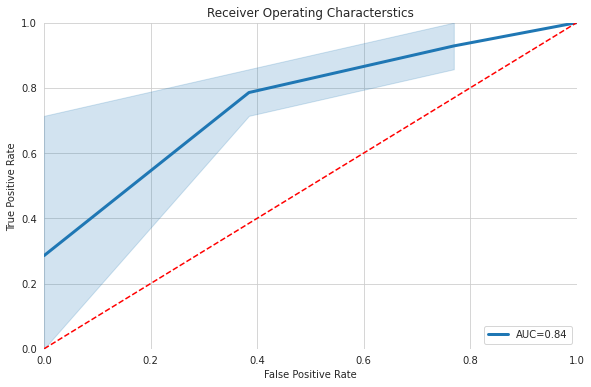

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characterstics')
sns.lineplot(x=fpr,y=tpr,label='AUC=%0.2f' %roc_auc,palette='purple',linewidth=3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left= True)



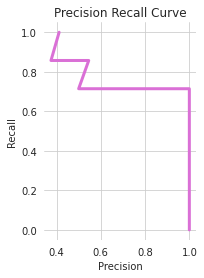

In [ ]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve,f1_score
precision, recall, thresholds=precision_recall_curve(Y.iloc[test_index],XGB_model_predict_proba[:,1])

plt.subplot(1,2,2)
plt.plot(precision, recall, linewidth=3,color='orchid')
sns.despine(top=True, bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel("Recall")
plt.title('Precision Recall Curve');


In [ ]:
#!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


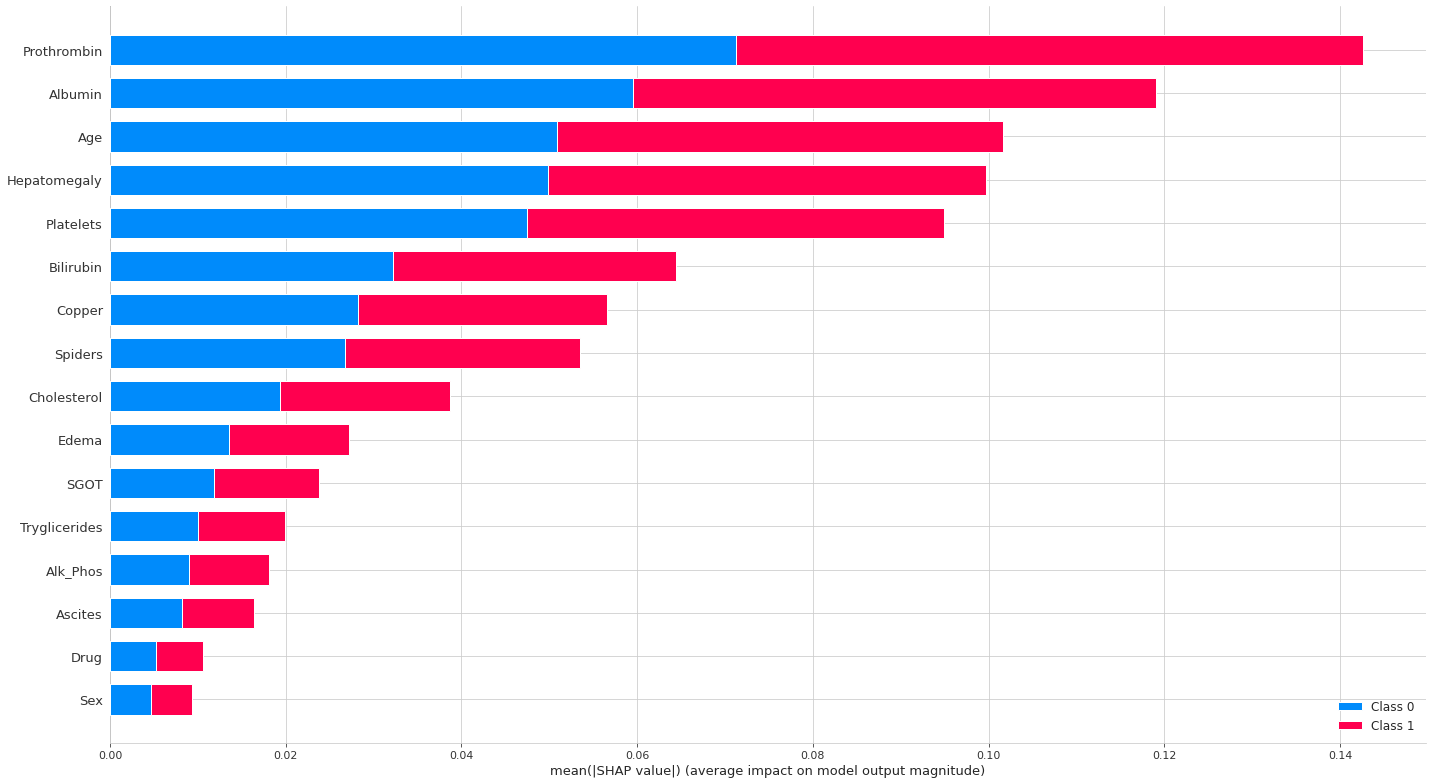

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_features=2, n_estimators=100,bootstrap=True)
rfc.fit(train,Y.iloc[train_index])
explainer=shap.TreeExplainer(rfc)
shap_values=explainer.shap_values(test)
shap.summary_plot(shap_values, train, plot_size=(20,11),alpha=0.2, plot_type='bar')

this plot shows what features contribute highest towards prediciting a positive class 
prothrombin, albumin , hepatomegaly are highly correlated with the disease prediction and feature like gender, drug, ascites have the least correlation
